In [38]:
import pandas as pd
df = pd.read_csv('Influencer.csv')
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [40]:
df.isnull().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

In [42]:
df['Country Or Region'].mode()

0    United States
Name: Country Or Region, dtype: object

In [43]:
df['Country Or Region'] = df['Country Or Region'].fillna('United States')

In [44]:
df.isnull().sum()

Rank                   0
Channel Info           0
Influence Score        0
Followers              0
Avg. Likes             0
Posts                  0
60-Day Eng Rate        0
New Post Avg. Likes    0
Total Likes            0
Country Or Region      0
dtype: int64

In [45]:
df['Followers'] = df['Followers'].replace({"k":"*1e3", "m":"*1e6"}, regex=True).map(df.eval)
df['Avg. Likes'] = df['Avg. Likes'].replace({"k":"*1e3", "m":"*1e6"}, regex=True).map(df.eval)
df['Posts'] = df['Posts'].replace({"k":"*1e3", "m":"*1e6"}, regex=True).map(df.eval)
df['New Post Avg. Likes'] = df['New Post Avg. Likes'].replace({"k":"*1e3", "m":"*1e6"}, regex=True).map(df.eval)
df['Total Likes'] = df['Total Likes'].replace({"m":"*1e6", "b":"*1e9"}, regex=True).map(df.eval)

In [46]:
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,3,\nleomessi,90,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09,United States
3,4,\nselenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
4,5,\ntherock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33600000.0,680600.0,4600.0,0.009,305700.0,3.100000e+09,Russia
196,197,\ndanbilzerian,84,33600000.0,2200000.0,1400.0,0.064,2100000.0,3.000000e+09,Canada
197,198,\nraisa6690,80,33600000.0,227800.0,4200.0,0.003,103200.0,9.559000e+08,Indonesia
198,199,\nluansantana,79,33500000.0,193300.0,865.0,0.003,82600.0,1.672000e+08,Brazil


In [47]:
df['Channel Info'] = df['Channel Info'].str.strip().str.lstrip(r"\\")

In [48]:
df['Channel Info']

0                cristiano
1              kyliejenner
2                 leomessi
3              selenagomez
4                  therock
              ...         
195    khabib_nurmagomedov
196           danbilzerian
197              raisa6690
198            luansantana
199             nancyajram
Name: Channel Info, Length: 200, dtype: object

In [49]:
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,cristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,3,leomessi,90,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09,United States
3,4,selenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
4,5,therock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,khabib_nurmagomedov,63,33600000.0,680600.0,4600.0,0.009,305700.0,3.100000e+09,Russia
196,197,danbilzerian,84,33600000.0,2200000.0,1400.0,0.064,2100000.0,3.000000e+09,Canada
197,198,raisa6690,80,33600000.0,227800.0,4200.0,0.003,103200.0,9.559000e+08,Indonesia
198,199,luansantana,79,33500000.0,193300.0,865.0,0.003,82600.0,1.672000e+08,Brazil


In [81]:
encoder = {'Country Or Region':{'United States':0, 'Brazil': 1, 'India' : 2, 'Indonesia' : 3, 'France' : 4,
                                'Spain' : 5, 'United Kingdom' : 6, 'Colombia' : 7, 'Canada' : 8, 'Mexico' : 9,
                                'Turkey' : 10, 'Netherlands' : 11, 'Switzerland' : 12, 'Germany' : 13, 'Czech Republic' : 14,
                                'British Virgin Islands' : 15,  'Sweden' : 16, 'Australia' : 17, 'Anguilla' : 18,
                                'CÃ´te d\'Ivoire' : 19, 'Puerto Rico' : 20, 'United Arab Emirates' : 21, 'Italy' : 22,
                                'Uruguay' : 23, 'Russia' : 24}}
df_new = df.replace(encoder)

In [82]:
df_new

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,cristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,5
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,0
2,3,leomessi,90,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09,0
3,4,selenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,0
4,5,therock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,0
...,...,...,...,...,...,...,...,...,...,...
195,196,khabib_nurmagomedov,63,33600000.0,680600.0,4600.0,0.009,305700.0,3.100000e+09,24
196,197,danbilzerian,84,33600000.0,2200000.0,1400.0,0.064,2100000.0,3.000000e+09,8
197,198,raisa6690,80,33600000.0,227800.0,4200.0,0.003,103200.0,9.559000e+08,3
198,199,luansantana,79,33500000.0,193300.0,865.0,0.003,82600.0,1.672000e+08,1


In [83]:
df_new = df_new.drop('Channel Info', axis = 1)

# 1. Are there any correlated features in the given dataset? If yes, state the correlation coefficient of the pair of features which are highly correlated.




In [84]:
df_new.corr()

,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
Rank,1.000000,-0.354843,-0.698193,-0.277699,-0.058132,0.028900,-0.272323,-0.465119,0.162201
Influence Score,-0.354843,1.000000,0.365428,0.048502,0.168287,-0.072460,0.040011,0.234987,-0.154306
Followers,-0.698193,0.365428,1.000000,0.346829,0.069171,-0.107439,0.260764,0.667546,-0.128276
Avg. Likes,-0.277699,0.048502,0.346829,1.000000,-0.348795,0.789359,0.892784,0.361296,-0.126140
Posts,-0.058132,0.168287,0.069171,-0.348795,1.000000,-0.334047,-0.285154,0.232038,0.106506
60-Day Eng Rate,0.028900,-0.072460,-0.107439,0.789359,-0.334047,1.000000,0.866293,-0.001560,-0.088106
New Post Avg. Likes,-0.272323,0.040011,0.260764,0.892784,-0.285154,0.866293,1.000000,0.351335,-0.118100
Total Likes,-0.465119,0.234987,0.667546,0.361296,0.232038,-0.001560,0.351335,1.000000,-0.042498
Country Or Region,0.162201,-0.154306,-0.128276,-0.126140,0.106506,-0.088106,-0.118100,-0.042498,1.000000


<Axes: >

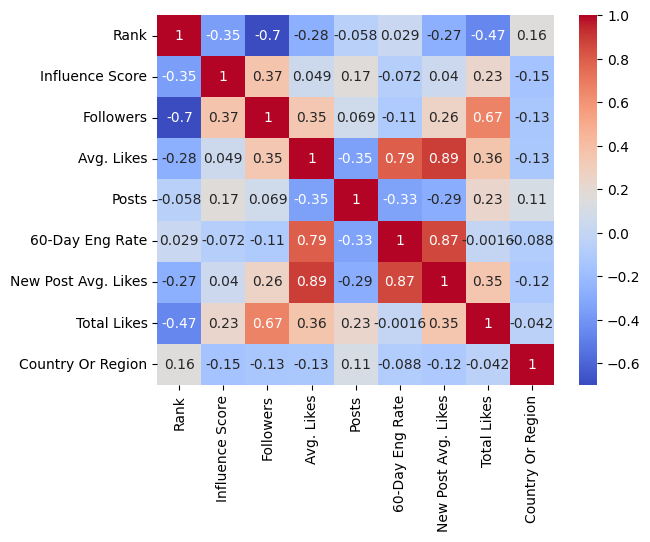

In [85]:
import seaborn as sns
sns.heatmap(df_new.corr(), annot = True, cmap = 'coolwarm')

'Followers' and 'Total Likes' with a coefficient value of 0.67,
'Avg. Likes' and 'New Post Avg. Likes' with a coefficient value of 0.89,
'Avg. Likes' and '60 - Day Eng Rate' with a coefficient value of 0.79,
'New Post Avg. Likes' and '60 - Day Eng Rate' with a coefficient value of 0.87,

'Followers' and 'Rank' with a coefficient value of -0.7


# 2. What is the frequency distribution of the following features?

○ Influence Score
○ Followers
○ Posts

Text(0.5, 1.0, 'frequency distribution of Influence Score')

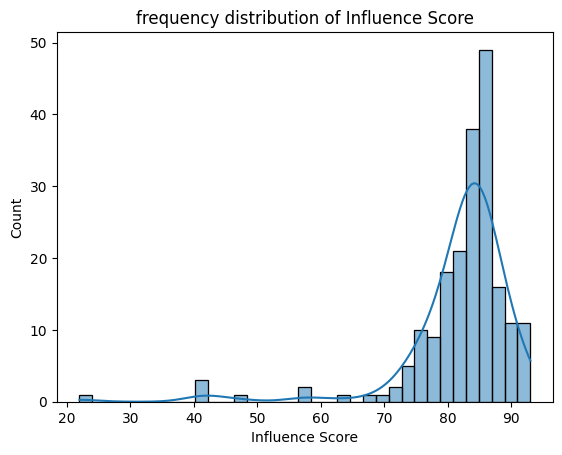

In [86]:
import matplotlib.pyplot as plt
sns.histplot(df_new['Influence Score'], kde = True)
plt.title('frequency distribution of Influence Score')

Text(0.5, 0, 'Followers(*100 million)')

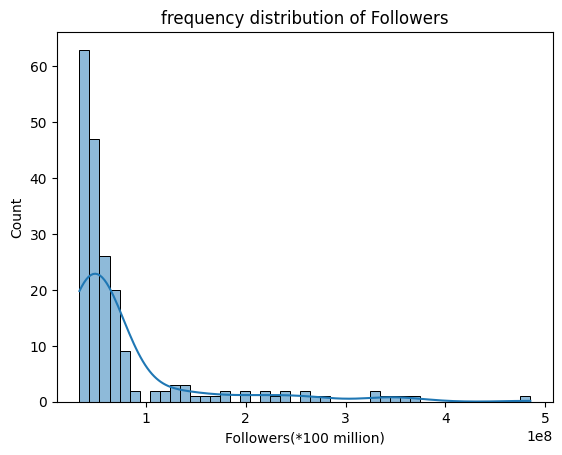

In [87]:
sns.histplot(df_new['Followers'], kde = True)
plt.title('frequency distribution of Followers')
plt.xlabel('Followers(*100 million)')

Text(0.5, 1.0, 'frequency distribution of Posts')

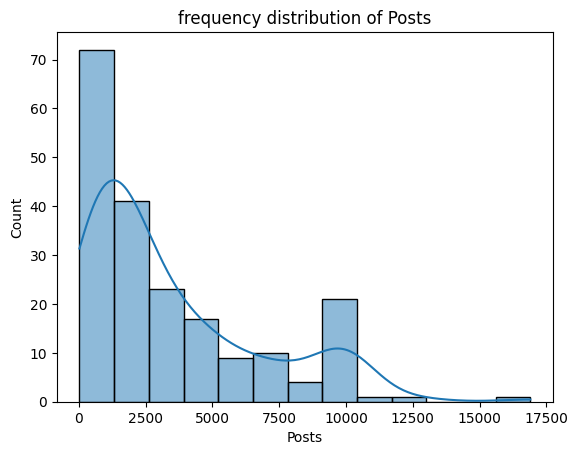

In [88]:
sns.histplot(df_new['Posts'], kde = True)
plt.title('frequency distribution of Posts')

# 3. Which country houses the highest number of Instagram Influencers? Please show the count of Instagram influencers in different countries using barchart.


In [89]:
df['Country Or Region'].mode()

0    United States
Name: Country Or Region, dtype: object

Text(0, 0.5, 'Number of Influencers')

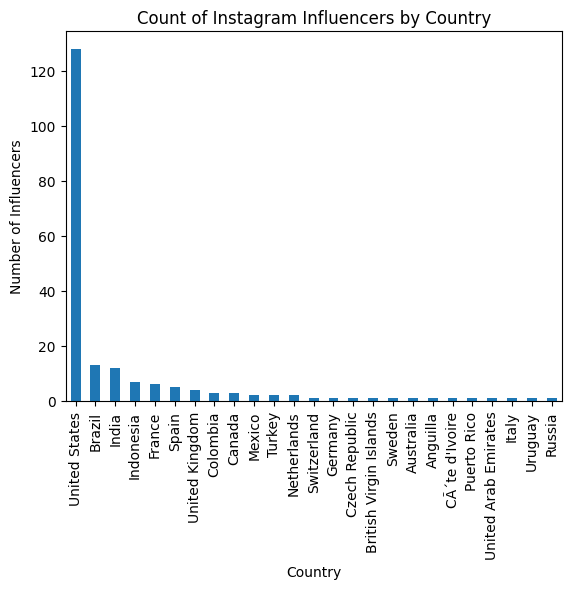

In [92]:
df['Country Or Region'].value_counts().plot(kind = 'bar')
plt.title('Count of Instagram Influencers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Influencers')

# 4. Who are the top 10 influencers in the given dataset based on the following features
● Followers
● Average likes
● Total Likes

In [115]:
df[['Channel Info','Followers']].sort_values(by = 'Followers', ascending = False).head(10)

,Channel Info,Followers
0,cristiano,485200000.0
1,kyliejenner,370700000.0
2,leomessi,363900000.0
3,selenagomez,348800000.0
4,therock,339400000.0
5,arianagrande,333000000.0
6,kimkardashian,330700000.0
7,beyonce,276100000.0
8,khloekardashian,273900000.0
9,justinbieber,260000000.0


In [116]:
df[['Channel Info','Avg. Likes']].sort_values(by = 'Avg. Likes', ascending = False).head(10)

,Channel Info,Avg. Likes
96,thv,15400000.0
131,j.m,14400000.0
165,rkive,10600000.0
0,cristiano,8700000.0
32,billieeilish,8400000.0
1,kyliejenner,8200000.0
2,leomessi,6700000.0
3,selenagomez,6100000.0
38,lalalalisa_m,6000000.0
22,zendaya,5900000.0


In [117]:
df[['Channel Info','Total Likes']].sort_values(by = 'Total Likes', ascending = False).head(10)

,Channel Info,Total Likes
1,kyliejenner,5.740000e+10
0,cristiano,2.910000e+10
22,zendaya,2.080000e+10
6,kimkardashian,1.980000e+10
5,arianagrande,1.850000e+10
25,badgalriri,1.800000e+10
19,neymarjr,1.440000e+10
9,justinbieber,1.400000e+10
16,nickiminaj,1.290000e+10
4,therock,1.260000e+10


# 5. Describe the relationship between the following pairs of features using a suitable graph
● Followers and Total Likes
● Followers and Influence Score
● Posts and Average likes
● Posts and Influence Score

Text(0.5, 1.0, 'Followers and Total Likes')

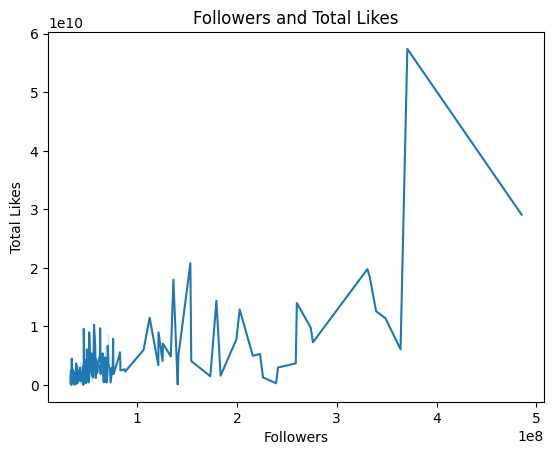

In [134]:
sns.lineplot(data = df, x='Followers', y='Total Likes')
plt.title('Followers and Total Likes')

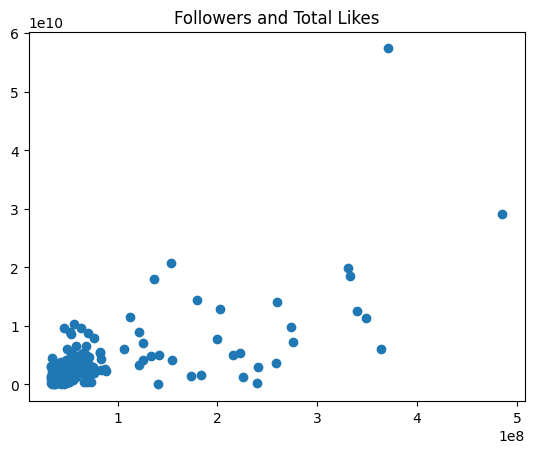

In [155]:
x = df['Followers']
y = df['Total Likes']
plt.title('Followers and Total Likes')
plt.scatter(x,y)

Text(0.5, 1.0, 'Followers and Influence Score')

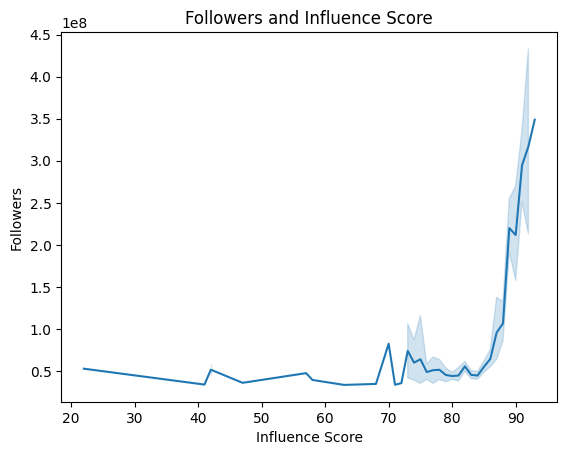

In [158]:
sns.lineplot(data = df, x='Influence Score', y ='Followers')
plt.title('Followers and Influence Score')

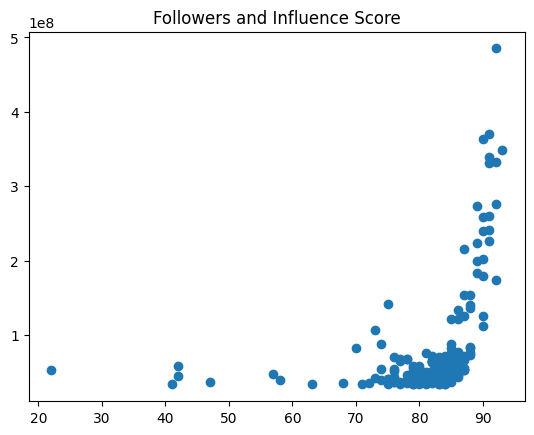

In [159]:
y = df['Followers']
x = df['Influence Score']
plt.title('Followers and Influence Score')
plt.scatter(x,y)

Text(0.5, 1.0, 'Posts and Avg. Likes')

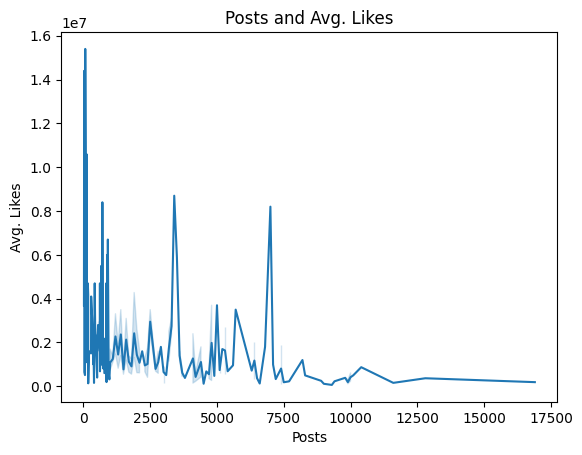

In [151]:
sns.lineplot(data = df, x = 'Posts', y = 'Avg. Likes')
plt.title('Posts and Avg. Likes')

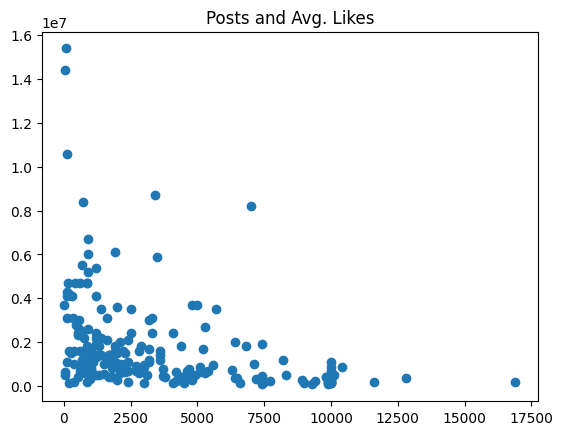

In [152]:
x = df['Posts']
y = df['Avg. Likes']
plt.title('Posts and Avg. Likes')
plt.scatter(x,y)


Text(0.5, 1.0, 'Posts and Influence Score')

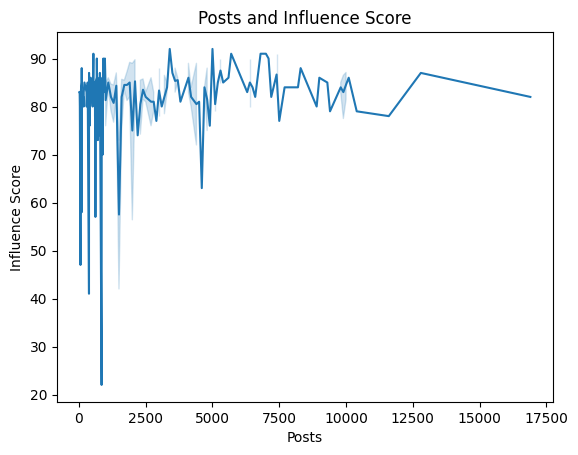

In [161]:
sns.lineplot(data = df, x = 'Posts', y = 'Influence Score')
plt.title('Posts and Influence Score')

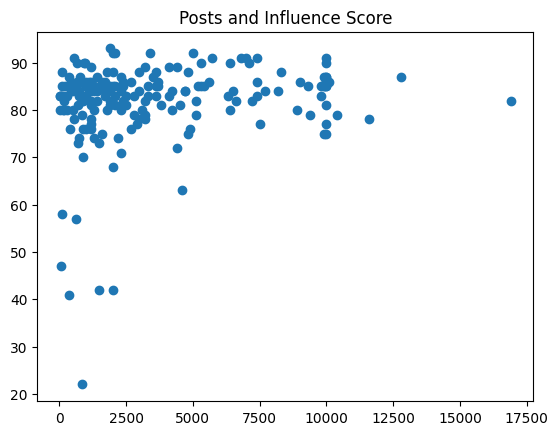

In [162]:
x = df['Posts']
y = df['Influence Score']
plt.title('Posts and Influence Score')
plt.scatter(x,y)